Basically I think what is skewing our data is the fact that too many people are alive so haven't had time to get an honsest result. 
Will probably have to do these models and then have another way of spitting out if they will die or not




In [97]:
%run -t numeric_mapping.py

data = data[data['Status'] == 0]
data.head()

Hello World
Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   T Stage                 4024 non-null   int64
 2   N Stage                 4024 non-null   int64
 3   6th Stage               4024 non-null   int64
 4   differentiate           4024 non-null   int64
 5   Grade                   4024 non-null   int64
 6   A Stage                 4024 non-null   int64
 7   Tumor Size              4024 non-null   int64
 8   Estrogen Status         4024 non-null   int64
 9   Progesterone Status    

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status,percent regional node positive
7,40,2,1,5,2,2,0,30,1,1,14,0,0.111111
10,68,1,1,4,2,2,0,13,1,1,64,0,0.111111
40,57,3,3,9,2,2,0,70,1,1,42,0,1.000000
46,42,1,3,9,2,2,0,9,0,0,39,0,0.133333
64,67,1,1,4,2,2,0,13,1,1,60,0,0.187500


In [98]:
data = remove_outliers_survival_months(data)
data.describe()


,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status,percent regional node positive
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.000000
mean,54.942346,2.081511,1.888668,6.777336,1.602386,2.397614,0.063618,37.882704,0.809145,0.652087,41.898608,0.0,0.494015
std,9.685835,0.844077,0.853590,1.867664,0.631947,0.631947,0.244315,24.694713,0.393366,0.476782,17.246157,0.0,0.330894
min,30.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,10.000000,0.0,0.032258
25%,48.000000,2.000000,1.000000,5.000000,1.000000,2.000000,0.000000,20.000000,1.000000,0.000000,28.000000,0.0,0.195238
50%,56.000000,2.000000,2.000000,7.000000,2.000000,2.000000,0.000000,30.000000,1.000000,1.000000,42.000000,0.0,0.444444
75%,63.000000,3.000000,3.000000,9.000000,2.000000,3.000000,0.000000,50.000000,1.000000,1.000000,55.000000,0.0,0.822134
max,69.000000,4.000000,3.000000,9.000000,3.000000,4.000000,1.000000,140.000000,1.000000,1.000000,78.000000,0.0,1.000000


In [99]:
#2 - Random Forest but regressive model. This might be better as we will be given an average umber rather than an estimated range.
#I would expect this to be less accurate as in right less often, but the mean squared error should be smaller.

#Regressor, most of the data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

#Input parameters = everything except survival months and status
data.head()

x = data[[ 'Estrogen Status', 'Progesterone Status', '6th Stage', 'Age']]
y = data["Survival Months"]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.7)
# Use RandomForestRegressor for regression tasks

rf = RandomForestRegressor(random_state=42, n_estimators=16, max_depth=3).fit(x_train, y_train)

# Making predictions based on the model
y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


#Checking accuracy on validation set
mse_validation = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_validation,"(((", str(mse_validation**0.5) + "))")

y_test_pred = rf.predict(x_test)
#Checking accuracy on test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", str(mse_test) + " ((" + str(mse_test**0.5) + "))")

# Getting feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print("Feature Importances:")
print(feature_importances)


#when only on dead, outliers removed, variable = 0.5 : V:222.79, T:304.62
#Changing to a 70/20/10 train test val split: V: 148.95, V: 129.055
#FUCKING NOTHING CHANGED BUT NOW ITS v:320.91, T:321.19

#only features being percent regional pos, age, es status, t stage: V: 289.89,t: 316.79
#max depth =3: V:279.64, T:297.44
#number of estimators = 16: V: 274.44, T: 302.11

#Adjusted faulty test size: V: 197.90, T: 284.666
#test split = .3, .7; V:158.75, T:298.011
#readjusting how output is written: V: 98.91,
#including progestrone status: V:97.19, T:67.53   
#40.478, 61.69
#got rid of differenciate: 39.599, 65.24

#if we really reduce dataset can get down to 11.58
#wait my outlier function was wrong, its 174.16, 299.91
#swap t stage for 6th stage: V:172.82, T:298.18







Mean Squared Error on Validation Set: 180.15635349902675 ((( 13.42223355105352))
Mean Squared Error on Test Set: 299.36753448431745 ((17.30224073593699))
Feature Importances:
           Feature  Importance
0  Estrogen Status    0.581061
1              Age    0.418939


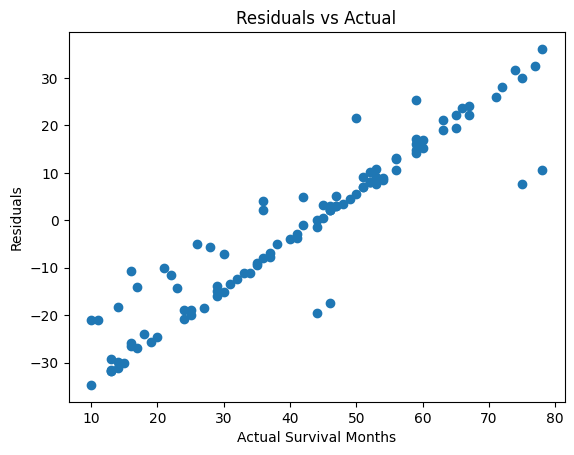

In [100]:
import matplotlib.pyplot as plt
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Survival Months')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()

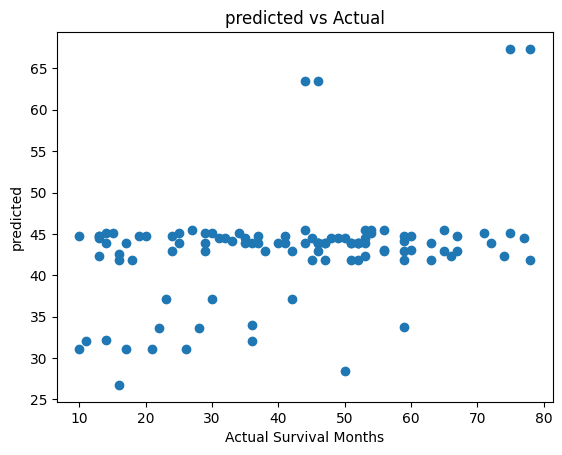

In [101]:
import matplotlib.pyplot as plt
predicted = y_test_pred
min_size = min(len(y_test), len(y_test_pred))
y_test = y_test[:min_size]
y_test_pred = y_test_pred[:min_size]
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Survival Months')
plt.ylabel('predicted')
plt.title('predicted vs Actual')
plt.show()

In [102]:
#Classifier with bins of 3 month size

from sklearn.calibration import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
np.random.seed(42)

data_grouped = data.copy()

label_encoder = LabelEncoder()
data_grouped['Survival Months Group'] = pd.cut(data_grouped['Survival Months'], bins=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90, np.inf])
data_grouped['Survival Months Group'] = label_encoder.fit_transform(data_grouped['Survival Months Group'])


x = data_grouped.drop(["Survival Months", "Status", "Survival Months Group"], axis=1)


y = data_grouped["Survival Months Group"]
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


# Checking the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test only:", accuracy_test)

accuracy_validation = accuracy_score(y_val, y_val_pred)
print("Accuracy on validation only:", accuracy_validation)
#Before removing race and maritial status: 0.0211
#After removing race and marital status: 0.0224
#After removing status: 0.01129. Worse, but in our case all future participants are alive, so this is not a good metric to use.
#After including validation set: V: .893, T: .91066
#removed regional nodes positive: V: .9154, T: .9057


#After switching to 3 month bins: V: .8159, T: .8437
#After removing outliers in survival months: V: 0.8695, T: 0.8433
#The above but extreme: !.5 is now .1: V:1, T:1, don't think this is feasable as almost half the data is removed.


Accuracy on test only: 0.0392156862745098
Accuracy on validation only: 0.06
